## Simple plots for XAS in ORCA

In [1]:
import numpy as np
import pandas as pd
import csv as csv

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.colors

In [3]:
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

In [4]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

from https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [5]:
"""
Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

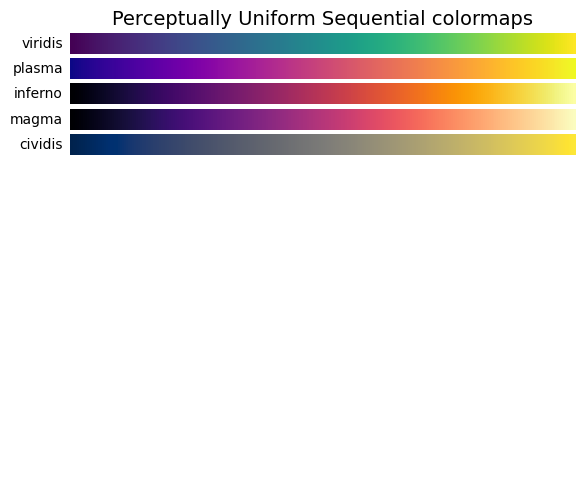

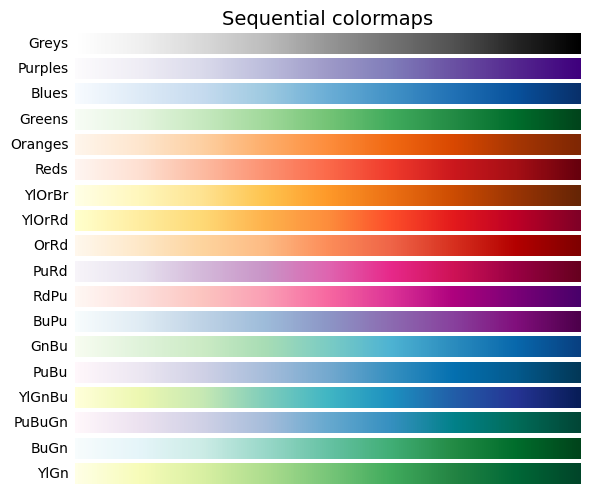

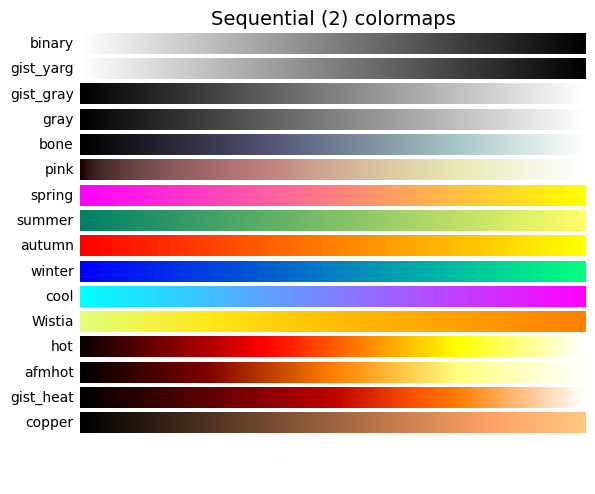

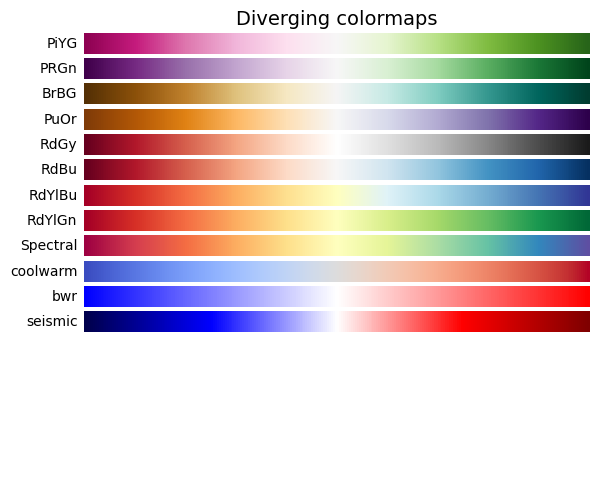

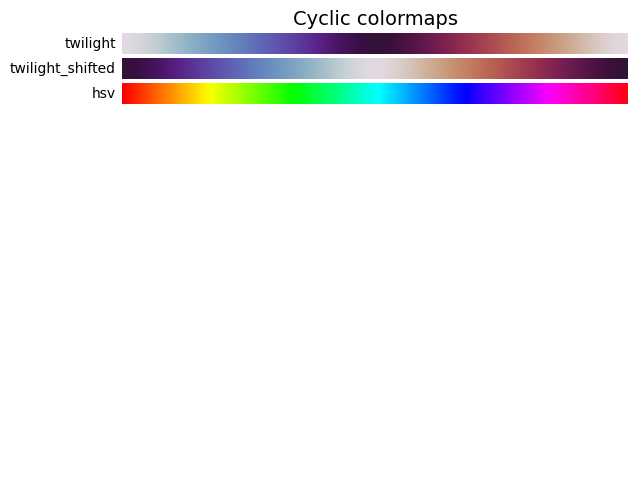

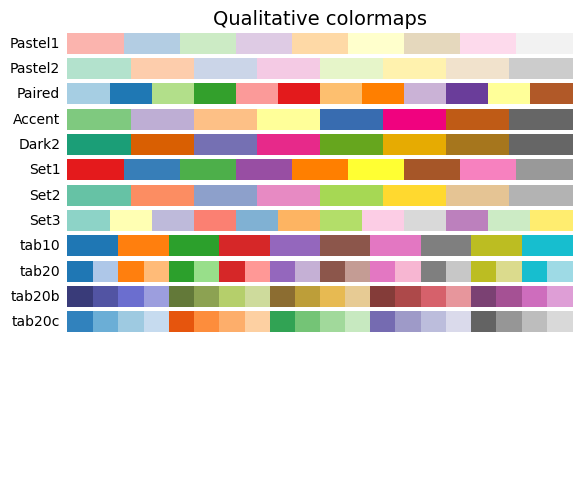

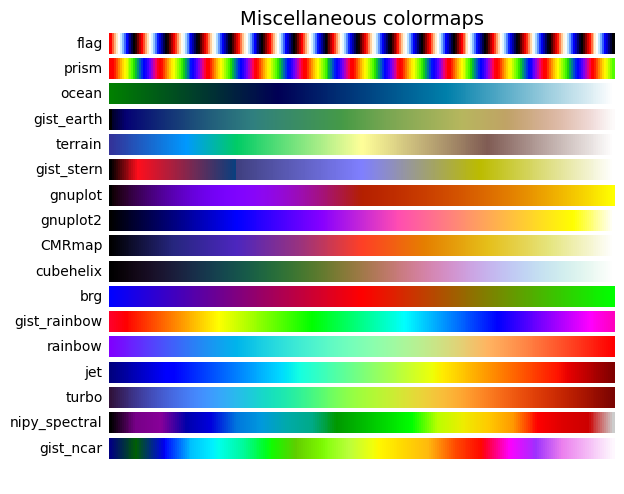

In [6]:
for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

In [7]:
# uncomment if you want to see the list of colors
#mcolors.CSS4_COLORS

#### Creating functions for plotting

In [8]:
def plot_normal(global_name, x_arg, y_arg, label, xlmt=False, xmin=282, xmax=298, \
              colname=False, ref_list=62, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    colname is the color name to be used, blue by default.
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    # chhosing color
    if colname:
        colors='purple'
    else:
        colors='blue'
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        #for ii in list_suf:
        n1.plot(x_arg, y_arg, data=newxrange(global_name, x_arg, xmin, xmax), \
                linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, color=colors, label=label)
            #cc+=1
    else:
        #for ii in list_suf:
        n1.plot(x_arg, y_arg, data=global_name, linestyle=linestyle, marker=marker, \
                linewidth=linewidth, markersize=markersize, color=colors, label=label)
            #cc+=1
    plt.xlabel('Distance')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()

In [9]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

#### Asigning variables

In [10]:
#Defining variables
file=""
post=".csv"
suff="fy_"
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [11]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

#### Calling output files

In [12]:
for ii in list_suf:
    globals()['fy_%s' % str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['fy_%s' % str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_43

,Energy,Intensity,dx,dy,dz
0,288.02,0.0,0.0,0.0,0.0
1,288.04,0.0,0.0,0.0,0.0
2,288.06,0.0,0.0,0.0,0.0
3,288.08,0.0,0.0,0.0,0.0
4,288.10,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2994,348.92,0.0,0.0,0.0,0.0
2995,348.94,0.0,0.0,0.0,0.0
2996,348.96,0.0,0.0,0.0,0.0
2997,348.98,0.0,0.0,0.0,0.0


In [13]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names

In [14]:
label_name = {suff+str(ii):str(ii/10)+'A' for ii in list_suf_resume} #creating list of label names from pd.data frame diff. names

### Plotting

In [15]:
name_out = 'fy_45'
label_name[name_out]

'4.5A'

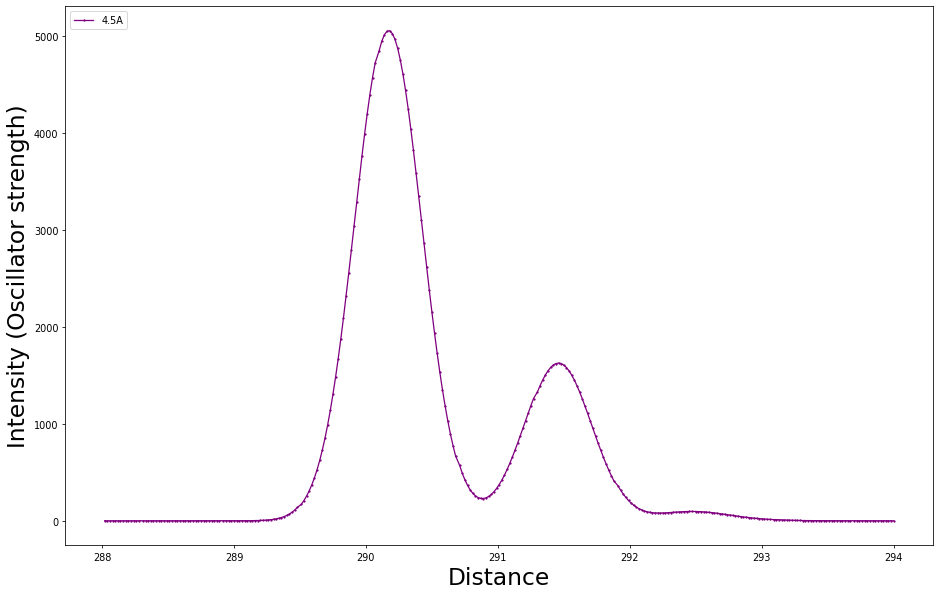

In [16]:
plot_normal(globals()['%s' % name_out], 'Energy', 'Intensity', label_name[name_out], dpi=70,\
         xlmt=True, colname='azure', xmin=288, xmax=294)